# Project I | Deep Learning: Image Classification with CNN
### Task Description
Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

## Assessment Components

In [25]:
# imports
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Data Preprocessing

- Data loading and preprocessing (e.g., normalization, resizing, augmentation).
- Create visualizations of some images, and labels.

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [13]:
# Normalize the pixel values to a range of [0, 1] or [-1, 1].
# Convert the labels into one-hot encoding
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 2. Model Architecture

- Design a CNN architecture suitable for image classification.
- Include convolutional layers, pooling layers, and fully connected layers.

In [51]:
model = Sequential([
    Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(32, 32, 3)),  # 3D for color
    Conv2D(64, (3, 3),padding='same', activation='relu'),                           # Convolution layer
    MaxPooling2D((2, 2)),                                                           # MaxPooling layer
    Conv2D(64, (3, 3),padding='same', activation='relu'),                           # Convulution layer
    Conv2D(64, (3, 3),padding='same', activation='relu'),                           # Convulution layer
    MaxPooling2D((2, 2)),                                                           # MaxPooling layer
    Flatten(),                                                                      # Flatten                  
    Dropout(0.5),                                                                   # Dropout  
    Dense(10, activation='softmax')                                                 # Dense
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,218 (524.29 KB)

 Trainable params: 134,218 (524.29 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Model Training

- Train the CNN model using appropriate optimization techniques (e.g., stochastic gradient descent, Adam).
- tilize techniques such as early stopping to prevent overfitting.

In [54]:
# Train the model with the split data
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 111ms/step - accuracy: 0.3284 - loss: 1.8105 - val_accuracy: 0.5546 - val_loss: 1.2458
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.5740 - loss: 1.2007 - val_accuracy: 0.6456 - val_loss: 1.0159
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.6525 - loss: 0.9940 - val_accuracy: 0.6882 - val_loss: 0.9108
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.6919 - loss: 0.8834 - val_accuracy: 0.7193 - val_loss: 0.8224
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.7193 - loss: 0.8034 - val_accuracy: 0.7313 - val_loss: 0.7763


## 4. Model Evaluation

- Evaluate the trained model on a separate validation set.
- Compute and report metrics such as accuracy, precision, recall, and F1-score.
- Visualize the confusion matrix to understand model performance across different classes.

In [58]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

313/313 - 2s - 7ms/step - accuracy: 0.7313 - loss: 0.7763
Test Accuracy: 0.73
Test Loss: 0.78


In [62]:
# Classification and predictions
# Get predictions
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Print classification report
print(classification_report(y_true, y_pred, target_names=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

    airplane       0.77      0.72      0.75      1000
  automobile       0.85      0.85      0.85      1000
        bird       0.59      0.62      0.60      1000
         cat       0.60      0.48      0.53      1000
        deer       0.62      0.74      0.68      1000
         dog       0.70      0.62      0.66      1000
        frog       0.77      0.82      0.79      1000
       horse       0.76      0.81      0.79      1000
        ship       0.88      0.78      0.82      1000
       truck       0.77      0.87      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



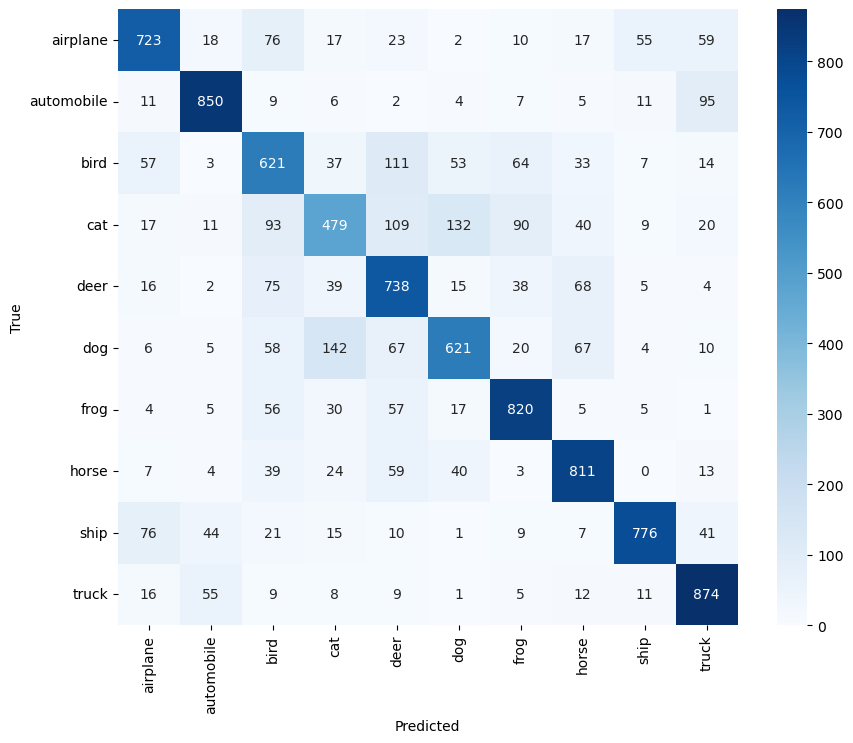

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
], yticklabels=[
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()